<a href="https://colab.research.google.com/github/Ramesh0325/CODSOFT-/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
dataset_path='/content/fraudTrain.csv'
fraud_data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(fraud_data.info())

# Summary statistics for numerical columns
print(fraud_data.describe())

# Check for missing values
print(fraud_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205695 entries, 0 to 205694
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             205695 non-null  int64  
 1   trans_date_trans_time  205695 non-null  object 
 2   cc_num                 205695 non-null  int64  
 3   merchant               205695 non-null  object 
 4   category               205695 non-null  object 
 5   amt                    205695 non-null  float64
 6   first                  205695 non-null  object 
 7   last                   205695 non-null  object 
 8   gender                 205695 non-null  object 
 9   street                 205695 non-null  object 
 10  city                   205695 non-null  object 
 11  state                  205695 non-null  object 
 12  zip                    205695 non-null  int64  
 13  lat                    205695 non-null  float64
 14  long                   205695 non-nu

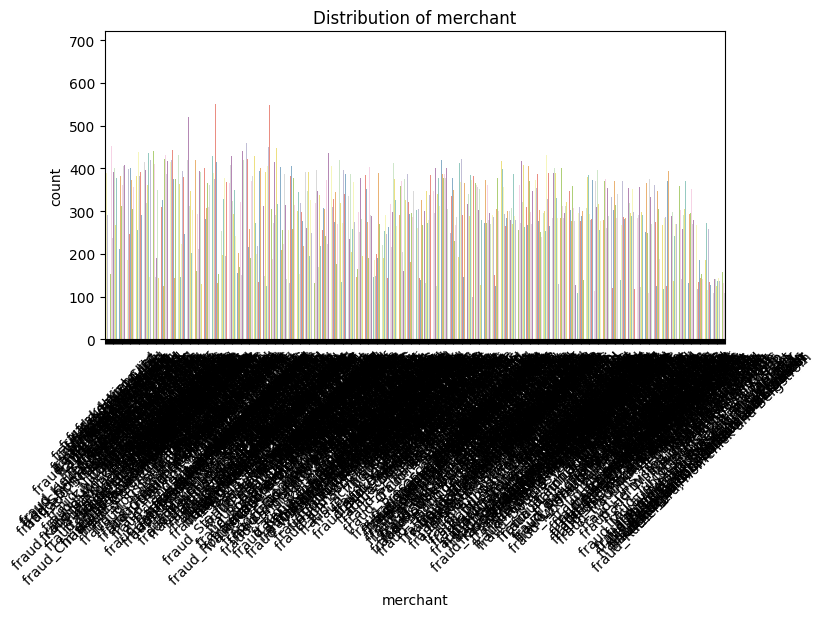

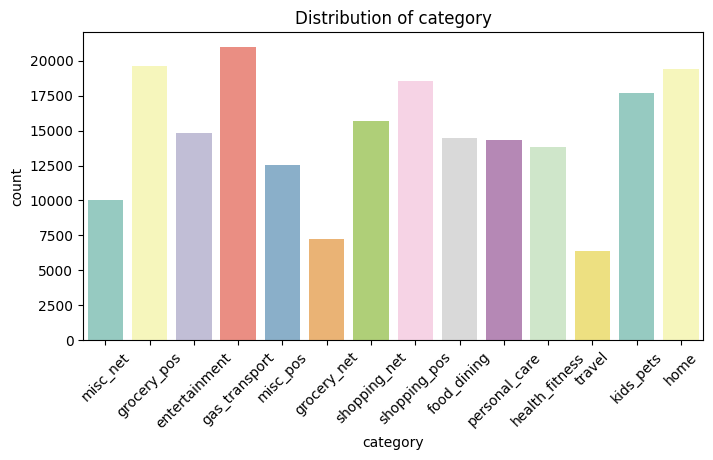

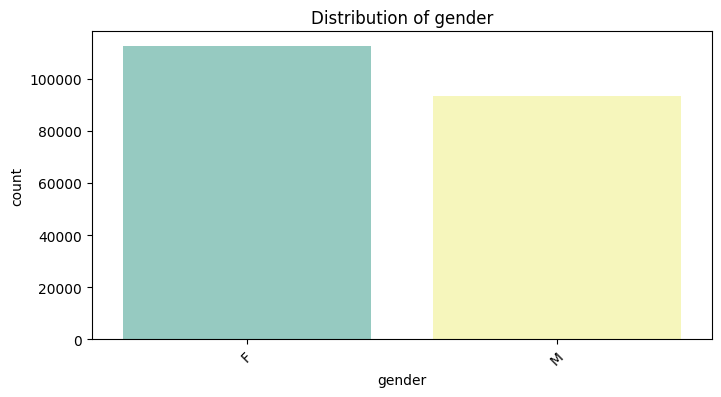

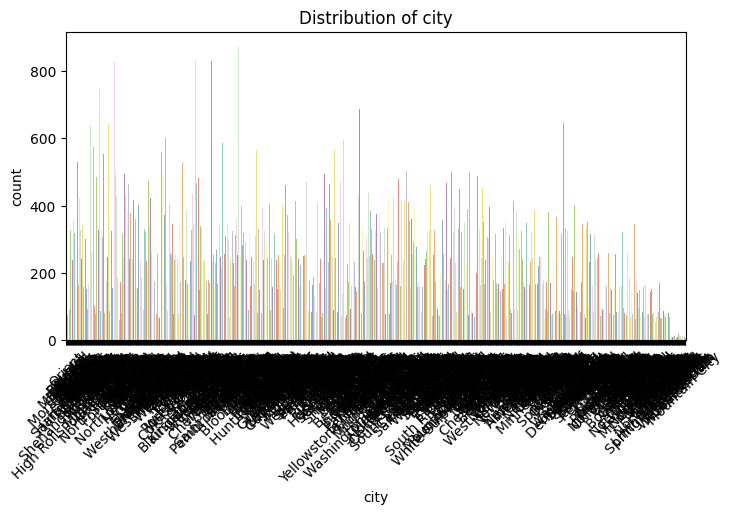

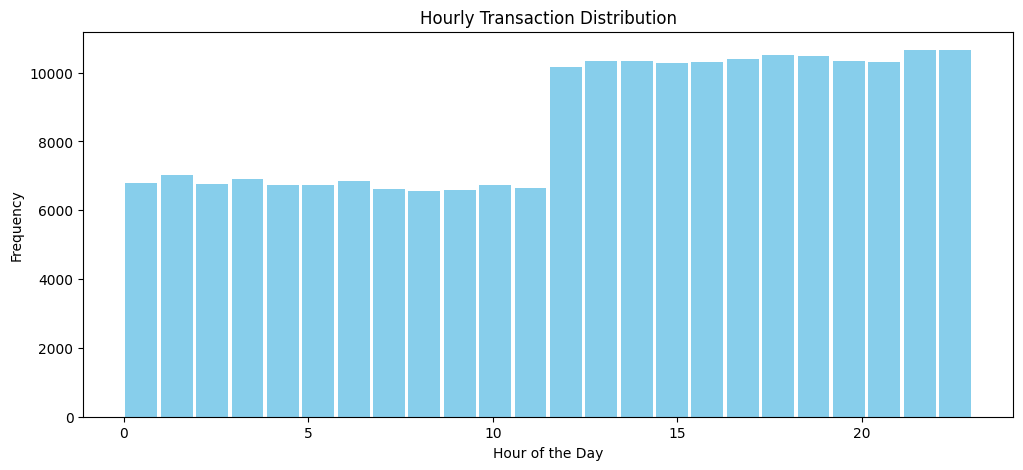

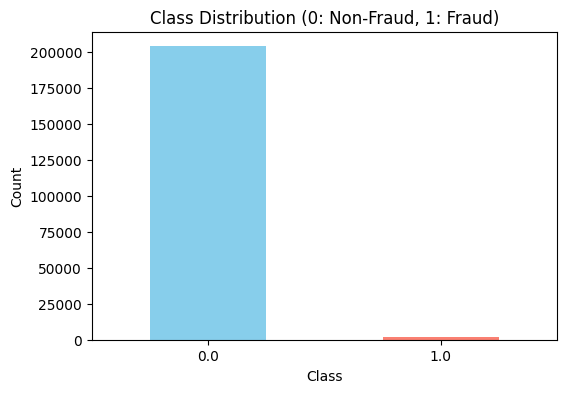

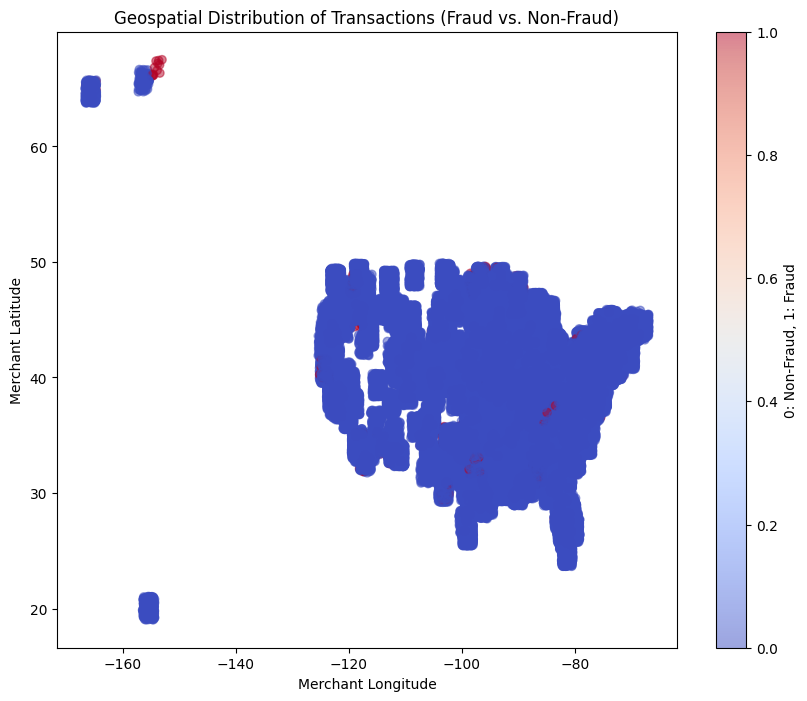

In [12]:
import seaborn as sns


# Explore categorical variables
categorical_columns = ['merchant', 'category', 'gender','city']

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=fraud_data, x=column, palette='Set3')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Convert 'trans_date_trans_time' and 'dob' to datetime
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])

# Time-based analysis
plt.figure(figsize=(12, 5))
fraud_data['trans_date_trans_time'].dt.hour.plot(kind='hist', bins=24, rwidth=0.9, color='skyblue')
plt.title('Hourly Transaction Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Visualize the class distribution
plt.figure(figsize=(6, 4))
fraud_data['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Geospatial data - Scatter plot of transactions
plt.figure(figsize=(10, 8))
plt.scatter(fraud_data['merch_long'], fraud_data['merch_lat'], c=fraud_data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geospatial Distribution of Transactions (Fraud vs. Non-Fraud)')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.colorbar(label='0: Non-Fraud, 1: Fraud')
plt.show()

In [13]:
# Feature 1: Transaction Amount Decimal Part
fraud_data['amt_decimal'] = fraud_data['amt'] % 1

# Ensure 'trans_date_trans_time' is treated as a string
fraud_data['trans_date_trans_time'] = fraud_data['trans_date_trans_time'].astype(str)

# Feature 2: Age of Cardholder at the Time of Transaction
fraud_data['transaction_date'] = pd.to_datetime(fraud_data['trans_date_trans_time'].str.split(' ').str[0])
fraud_data['cardholder_age'] = (fraud_data['transaction_date'] - pd.to_datetime(fraud_data['dob'])).dt.days // 365

# Feature 3: Transaction Amount to City Population Ratio
fraud_data['amt_to_city_pop_ratio'] = fraud_data['amt'] / fraud_data['city_pop']

# Display the updated dataset with new features
print(fraud_data[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.97              30               0.001422
1         0.23              40               0.719664
2         0.11              56               0.052987
3         0.00              52               0.023208
4         0.96              32               0.423838


In [14]:
# Define a list of columns to drop
columns_to_drop = [
    'Unnamed: 0',        # An index or identifier
    'cc_num',            # Masked credit card numbers
    'trans_date_trans_time',  #We have unix_time
    'transaction_date',  # Same as unix_time
    'first',             # First name
    'last',              # Last name
    'street',            # Street address
    'city',              # City (state information is more relevant)
    'state',             # State (zip code and lat/long provide location info)
    'zip',               # Zip code (redundant with lat/long)
    'dob',               # Date of birth (we've calculated cardholder_age)
    'trans_num',         # Transaction number or identifier
]

# Drop the specified columns
fraud_data = fraud_data.drop(columns=columns_to_drop)

# Display the updated dataset
print(fraud_data.head())

                             merchant       category     amt gender      lat  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F  36.0788   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F  48.8878   
2                fraud_Lind-Buckridge  entertainment  220.11      M  42.1808   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M  46.2306   
4                 fraud_Keeling-Crist       misc_pos   41.96      M  38.4207   

       long  city_pop                                job     unix_time  \
0  -81.1781      3495          Psychologist, counselling  1.325376e+09   
1 -118.2105       149  Special educational needs teacher  1.325376e+09   
2 -112.2620      4154        Nature conservation officer  1.325376e+09   
3 -112.1138      1939                    Patent attorney  1.325376e+09   
4  -79.4629        99     Dance movement psychotherapist  1.325376e+09   

   merch_lat  merch_long  is_fraud  amt_decimal  cardholder_age  \
0  36.0

In [17]:
# Load your testing dataset
testdataset_path='/content/fraudTest.csv'
testing_data = pd.read_csv(testdataset_path)

# Handle missing values (if any)
testing_data = testing_data.dropna()

In [18]:
# Feature 1: Transaction Amount Decimal Part
testing_data['amt_decimal'] = testing_data['amt'] % 1

# Ensure 'trans_date_trans_time' is treated as a string
testing_data['trans_date_trans_time'] = testing_data['trans_date_trans_time'].astype(str)

# Feature 2: Age of Cardholder at the Time of Transaction
testing_data['transaction_date'] = pd.to_datetime(testing_data['trans_date_trans_time'].str.split(' ').str[0])
testing_data['cardholder_age'] = (testing_data['transaction_date'] - pd.to_datetime(testing_data['dob'])).dt.days // 365

# Feature 3: Transaction Amount to City Population Ratio
testing_data['amt_to_city_pop_ratio'] = testing_data['amt'] / testing_data['city_pop']

# Display the updated dataset with new features
print(testing_data[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.86              52               0.000009
1         0.84              30               0.098808
2         0.28              49               0.001197
3         0.05              32               0.001096
4         0.19              65               0.002833


In [19]:
testing_data = testing_data.drop(columns=columns_to_drop)

In [20]:
# Handle missing values (if any)
fraud_data = fraud_data.dropna()

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'merchant', 'category', 'job']
for col in categorical_columns:
    fraud_data[col] = label_encoder.fit_transform(fraud_data[col])
    testing_data[col] = label_encoder.fit_transform(testing_data[col])

<ipython-input-20-0b9aa7abbcc1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data[col] = label_encoder.fit_transform(fraud_data[col])


In [21]:
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and the target variable (y)
X_train = fraud_data.drop(columns=['is_fraud'])
y_train = fraud_data['is_fraud']

In [22]:
# Split the testing data into features (X_test) and the target variable (y_test)
X_val = testing_data.drop(columns=['is_fraud'])
y_val = testing_data['is_fraud']

In [23]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Make predictions on the validation data
y_pred = model.predict(X_val)

# Evaluate the model's performance on the validation data
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print or store the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9953918285331548
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
